# 深度学习项目：构建卷积神经网络实现图像多分类任务
[https://blog.csdn.net/weixin_33419305/article/details/144422382](https://blog.csdn.net/weixin_33419305/article/details/144422382)

简介：卷积神经网络（CNN）是深度学习在图像识别领域的强大工具，本案例通过名为"machine_photo_data.zip"的图片数据集，训练CNN模型完成对八种不同零件的分类任务。介绍使用Keras库构建CNN模型，包括定义卷积层、池化层、全连接层以及使用softmax函数进行多分类。模型训练过程中涉及前向传播、反向传播、权重更新和损失函数的使用。训练结果达到99%的高识别率，展示了深度学习在自动化生产线零件识别中的应用潜力。

In [1]:
#load the dataset
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

img1 = X_train[0]
feature_size = img1.shape[0] * img1.shape[1] 

# format input data
X_train_normal = X_train.reshape(X_train.shape[0], feature_size).astype('float32') / 255.0
X_test_normal = X_test.reshape(X_test.shape[0], feature_size).astype('float32') / 255.0

# convert class vectors to binary class matrices
y_train_format = keras.utils.to_categorical(y_train, num_classes)
y_test_format = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 构建模型
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input
from keras.models import Sequential

model = keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#模型编译与训练
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train_format, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7845 - loss: 2.4715 - val_accuracy: 0.9775 - val_loss: 0.0681
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9492 - loss: 0.1664 - val_accuracy: 0.9855 - val_loss: 0.0514
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9598 - loss: 0.1329 - val_accuracy: 0.9858 - val_loss: 0.0516
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9654 - loss: 0.1158 - val_accuracy: 0.9860 - val_loss: 0.0482
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9680 - loss: 0.1075 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9721 - loss: 0.0922 - val_accuracy: 0.9875 - val_loss: 0.0416
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9740 - loss: 0.0851 - val_accuracy: 0.9885 - val_loss: 0.0398
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9741 - loss: 

In [7]:
score = model.evaluate(X_train, y_train_format, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02086833119392395
Test accuracy: 0.9935833215713501


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
7


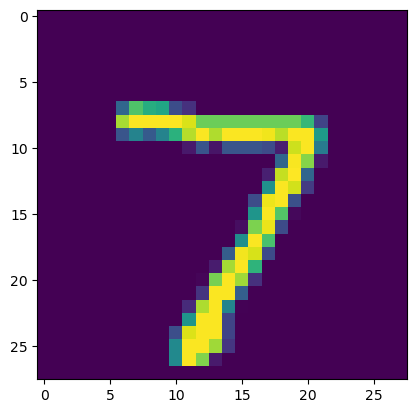

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y_test_predict = model.predict(X_test)
y_test_predict_class = np.argmax(y_test_predict, axis=1)

print(y_test_predict_class[0])
plt.imshow(X_test[0])


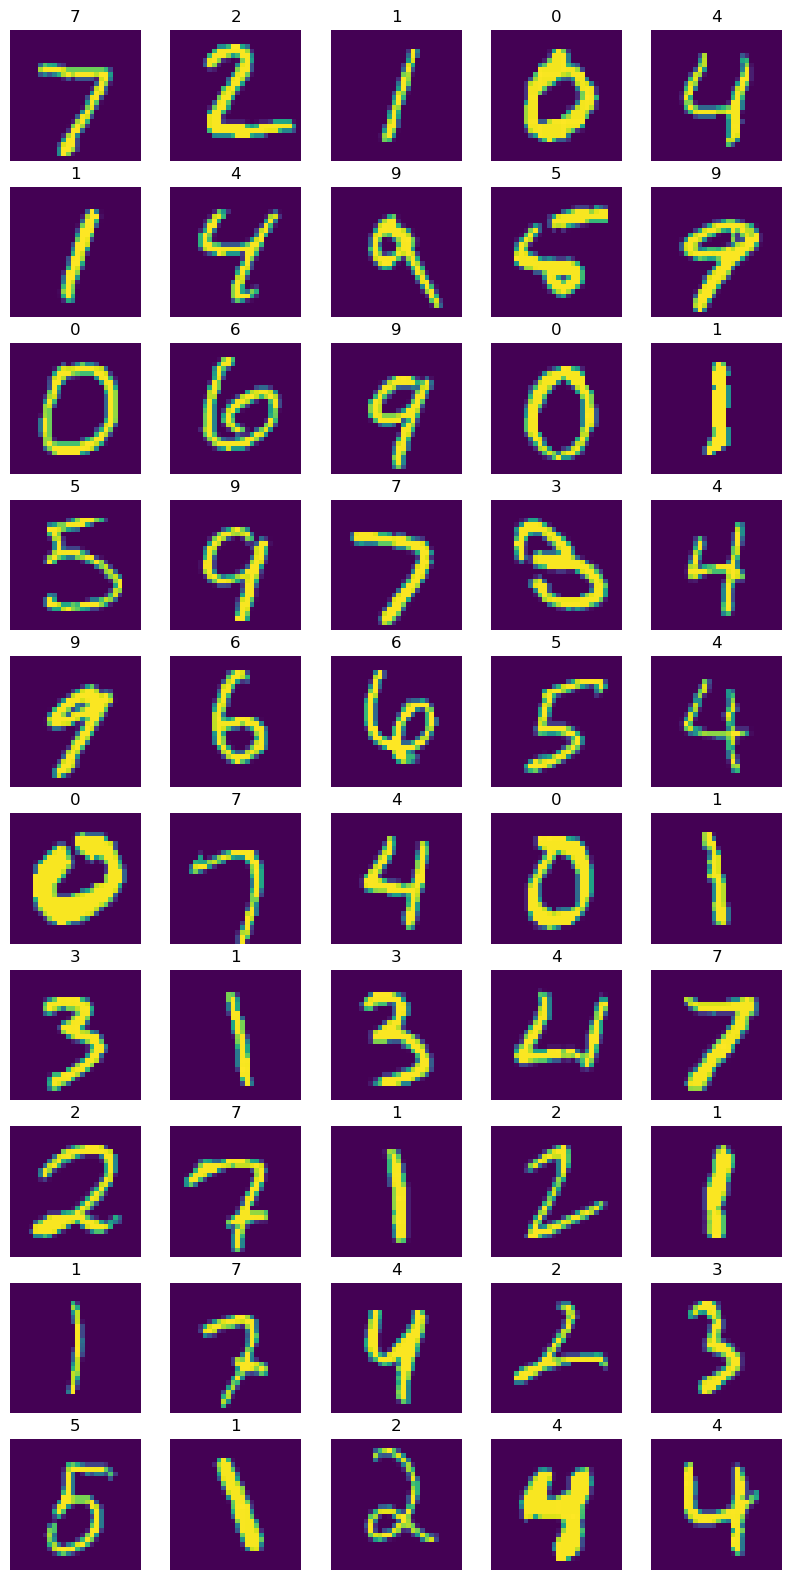

In [15]:
# 绘制预测结果
fig1 = plt.figure(figsize=(10,20))
for i in range(10):
    for j in range(5):
        index = i*5+j
        img = X_test[index]
        value = y_test_predict_class[index]
        plt.subplot(10,5,index+1)
        plt.title(value)
        plt.imshow(img)
        plt.axis('off')